# Lab 02 - Bài tập

## THÔNG TIN SINH VIÊN

- Họ tên: Thân Hoàng Thiên Thiên
- MSSV: 22687721


Sinh viên ghi số bài làm được vào ô dưới đây:

## KẾT QUẢ: 10/10 bài

---

In [1]:
# Run this cell first to import the libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## PANDAS

Bạn hãy tạo một DataFrame có tên `df_sales` chứa thông tin các sản phẩm:

In [2]:
sales_data = {
    'product_id': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008'],
    'product_name': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Tablet', 'Phone', 'Headphones', 'Webcam'],
    'category': ['Electronics', 'Accessories', 'Accessories', 'Electronics', 'Electronics', 'Electronics', 'Accessories', 'Accessories'],
    'price': [999, 25, 75, 299, 499, 699, 129, 89],
    'units_sold': [15, 120, 85, 35, 28, 45, 67, 23],
    'supplier': ['TechCorp', 'AccessCo', 'AccessCo', 'TechCorp', 'MobileTech', 'MobileTech', 'AudioTech', 'CameraCo']
}

df_sales = pd.DataFrame(sales_data)

### 1. Hiểu dữ liệu

a. Kích thước của dữ liệu?

b. Tên các cột?

c. Hiển thị 3 dòng đầu tiên và 3 dòng cuối cùng

d. Thống kê mô tả các biến định lượng

In [3]:
# YOUR CODE HERE
# a. Kích thước
print("Kích thước của DataFrame:", df_sales.shape)

Kích thước của DataFrame: (8, 6)


In [4]:
# b. Tên các cột
print("Tên các cột trong DataFrame:", df_sales.columns.tolist())

Tên các cột trong DataFrame: ['product_id', 'product_name', 'category', 'price', 'units_sold', 'supplier']


In [6]:
# c. Hiển thị 3 dòng đầu tiên và 3 dòng cuối cùng
print("3 dòng đầu tiên của DataFrame:\n", df_sales.head(3))
print("3 dòng cuối cùng của DataFrame:\n", df_sales.tail(3))

3 dòng đầu tiên của DataFrame:
   product_id product_name     category  price  units_sold  supplier
0       P001       Laptop  Electronics    999          15  TechCorp
1       P002        Mouse  Accessories     25         120  AccessCo
2       P003     Keyboard  Accessories     75          85  AccessCo
3 dòng cuối cùng của DataFrame:
   product_id product_name     category  price  units_sold    supplier
5       P006        Phone  Electronics    699          45  MobileTech
6       P007   Headphones  Accessories    129          67   AudioTech
7       P008       Webcam  Accessories     89          23    CameraCo


In [7]:
#d. Thống kê mô tả các biến định lượng
print("Thống kê mô tả các biến định lượng:\n", df_sales.describe())

Thống kê mô tả các biến định lượng:
            price  units_sold
count    8.00000    8.000000
mean   351.75000   52.250000
std    351.72869   35.979161
min     25.00000   15.000000
25%     85.50000   26.750000
50%    214.00000   40.000000
75%    549.00000   71.500000
max    999.00000  120.000000


### 2. Lọc dữ liệu

a. Lọc các cột sau: 'product_name', 'price', and 'units_sold'

b. Lọc các sản phẩm có giá trên 100

c. Tìm các sản phẩm điện tử ('Electronics') với số lượng bán trên 30

d. Tìm những sản phẩm phụ kiện (`Accessories`) có giá từ 50 đến 100

In [12]:
# YOUR CODE HERE
# a. Lọc các cột sau: 'product_name', 'price', and 'units_sold'
df_sales[['product_name', 'price', 'units_sold']]

,product_name,price,units_sold
0,Laptop,999,15
1,Mouse,25,120
2,Keyboard,75,85
3,Monitor,299,35
4,Tablet,499,28
5,Phone,699,45
6,Headphones,129,67
7,Webcam,89,23


In [9]:
# b. Lọc các sản phẩm có giá trên 100
df_sales[df_sales['price'] > 100]

,product_id,product_name,category,price,units_sold,supplier
0,P001,Laptop,Electronics,999,15,TechCorp
3,P004,Monitor,Electronics,299,35,TechCorp
4,P005,Tablet,Electronics,499,28,MobileTech
5,P006,Phone,Electronics,699,45,MobileTech
6,P007,Headphones,Accessories,129,67,AudioTech


In [10]:
# c. Tìm các sản phẩm điện tử ('Electronics') với số lượng bán trên 30
df_sales[(df_sales['category'] == 'Electronics') & (df_sales['units_sold'] > 30)]

,product_id,product_name,category,price,units_sold,supplier
3,P004,Monitor,Electronics,299,35,TechCorp
5,P006,Phone,Electronics,699,45,MobileTech


In [11]:
# d. Tìm những sản phẩm phụ kiện (`Accessories`) có giá từ 50 đến 100
df_sales[(df_sales['category'] == 'Accessories') & (df_sales['price'].between(50, 100))]

,product_id,product_name,category,price,units_sold,supplier
2,P003,Keyboard,Accessories,75,85,AccessCo
7,P008,Webcam,Accessories,89,23,CameraCo


### 3. Tạo cột mới

Tao thêm các cột sau:

a. Tạo cột doanh thu `revenue` = `price` * `units_sold`

b. Tạo cột `price_category` dựa trên giá của sản phẩm:
   - 'Low' nếu giá < 100
   - 'Medium' nếu 1000 <= giá <= 500
   - 'High' nếu giá > 500

c. Tạo cộ `high_performer`:  True if units_sold > median(units_sold)

In [13]:
# YOUR CODE HERE
# a. Tạo cột doanh thu `revenue` = `price` * `units_sold`
df_sales['revenue'] = df_sales['price'] * df_sales['units_sold']
df_sales

,product_id,product_name,category,price,units_sold,supplier,revenue
0,P001,Laptop,Electronics,999,15,TechCorp,14985
1,P002,Mouse,Accessories,25,120,AccessCo,3000
2,P003,Keyboard,Accessories,75,85,AccessCo,6375
3,P004,Monitor,Electronics,299,35,TechCorp,10465
4,P005,Tablet,Electronics,499,28,MobileTech,13972
5,P006,Phone,Electronics,699,45,MobileTech,31455
6,P007,Headphones,Accessories,129,67,AudioTech,8643
7,P008,Webcam,Accessories,89,23,CameraCo,2047


In [15]:
#b. Tạo cột `price_category` dựa trên giá của sản phẩm:
#   - 'Low' nếu giá < 100
#   - 'Medium' nếu 1000 <= giá <= 500
#  - 'High' nếu giá > 500
def categorize_price(price):
    if price < 100:
        return 'Low'
    elif 100 <= price <= 500:
        return 'Medium'
    else:
        return 'High'

df_sales['price_category'] = df_sales['price'].apply(categorize_price)
df_sales

,product_id,product_name,category,price,units_sold,supplier,revenue,price_category
0,P001,Laptop,Electronics,999,15,TechCorp,14985,High
1,P002,Mouse,Accessories,25,120,AccessCo,3000,Low
2,P003,Keyboard,Accessories,75,85,AccessCo,6375,Low
3,P004,Monitor,Electronics,299,35,TechCorp,10465,Medium
4,P005,Tablet,Electronics,499,28,MobileTech,13972,Medium
5,P006,Phone,Electronics,699,45,MobileTech,31455,High
6,P007,Headphones,Accessories,129,67,AudioTech,8643,Medium
7,P008,Webcam,Accessories,89,23,CameraCo,2047,Low


In [16]:
# c. Tạo cột `high_performer`:  True if units_sold > median(units_sold)
median_units = df_sales['units_sold'].median()
df_sales['high_performer'] = df_sales['units_sold'] > median_units
df_sales

,product_id,product_name,category,price,units_sold,supplier,revenue,price_category,high_performer
0,P001,Laptop,Electronics,999,15,TechCorp,14985,High,False
1,P002,Mouse,Accessories,25,120,AccessCo,3000,Low,True
2,P003,Keyboard,Accessories,75,85,AccessCo,6375,Low,True
3,P004,Monitor,Electronics,299,35,TechCorp,10465,Medium,False
4,P005,Tablet,Electronics,499,28,MobileTech,13972,Medium,False
5,P006,Phone,Electronics,699,45,MobileTech,31455,High,True
6,P007,Headphones,Accessories,129,67,AudioTech,8643,Medium,True
7,P008,Webcam,Accessories,89,23,CameraCo,2047,Low,False


### 4. Xử lý dữ liệu thiếu

Khởi tạo một DataFrame về dữ liệu khảo sát dưới đây và thực hiện các yêu cầu::

a. Hiển thị số lượng giá trị thiếu trong mỗi cột và phần trăm giá trị thiếu

b. Tạo một bản sao chứa dữ liệu đã loại bỏ các dòng có giá trị thiếu

c. Tạo một bản sao chứa các giá trị định lượng bị thiếu đã được thay thế bằng giá trị trung bình của cột đó

d. Tạo một bản sao chứa dữ liệu thiếu ở cột `city` được thay thế bằng giá trị phổ biến nhất (mode) của cột đó

In [17]:
# Create dataset with missing values
survey_data = {
    'respondent_id': range(1, 11),
    'age': [25, 30, None, 35, 28, None, 45, 32, 29, 38],
    'income': [50000, None, 45000, 60000, None, 55000, 75000, None, 48000, 62000],
    'satisfaction': [4, 5, 3, None, 4, 5, None, 3, 4, 5],
    'city': ['NYC', 'LA', 'Chicago', None, 'NYC', 'LA', 'Chicago', 'NYC', None, 'LA']
}

df_survey = pd.DataFrame(survey_data)

In [18]:
# YOUR CODE HERE
#a. Hiển thị số lượng giá trị thiếu trong mỗi cột và phần trăm giá trị thiếu
missing_count = df_survey.isna().sum()
missing_percent = df_survey.isna().mean() * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percent': missing_percent
})

missing_summary

,Missing Count,Missing Percent
respondent_id,0,0.0
age,2,20.0
income,3,30.0
satisfaction,2,20.0
city,2,20.0


In [19]:
#b. Tạo một bản sao chứa dữ liệu đã loại bỏ các dòng có giá trị thiếu
df_survey_dropped = df_survey.dropna()
df_survey_dropped

,respondent_id,age,income,satisfaction,city
0,1,25.0,50000.0,4.0,NYC
9,10,38.0,62000.0,5.0,LA


In [20]:
#c. Tạo một bản sao chứa các giá trị định lượng bị thiếu đã được thay thế bằng giá trị trung bình của cột đó
df_filled_mean = df_survey.copy()
quant_cols = ['age', 'income', 'satisfaction']

for col in quant_cols:
    df_filled_mean[col].fillna(df_survey[col].mean(), inplace=True)

df_filled_mean




C:\Users\thanh\AppData\Local\Temp\ipykernel_29212\4183455845.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean[col].fillna(df_survey[col].mean(), inplace=True)


,respondent_id,age,income,satisfaction,city
0,1,25.00,50000.000000,4.000,NYC
1,2,30.00,56428.571429,5.000,LA
2,3,32.75,45000.000000,3.000,Chicago
3,4,35.00,60000.000000,4.125,None
4,5,28.00,56428.571429,4.000,NYC
5,6,32.75,55000.000000,5.000,LA
6,7,45.00,75000.000000,4.125,Chicago
7,8,32.00,56428.571429,3.000,NYC
8,9,29.00,48000.000000,4.000,None
9,10,38.00,62000.000000,5.000,LA


In [21]:
#d. Tạo một bản sao chứa dữ liệu thiếu ở cột `city` được thay thế bằng giá trị phổ biến nhất (mode) của cột đó
df_survey_city_filled = df_survey.copy()
df_survey_city_filled['city'] = df_survey_city_filled['city'].fillna(df_survey_city_filled['city'].mode()[0])
df_survey_city_filled


,respondent_id,age,income,satisfaction,city
0,1,25.0,50000.0,4.0,NYC
1,2,30.0,NaN,5.0,LA
2,3,NaN,45000.0,3.0,Chicago
3,4,35.0,60000.0,NaN,LA
4,5,28.0,NaN,4.0,NYC
5,6,NaN,55000.0,5.0,LA
6,7,45.0,75000.0,NaN,Chicago
7,8,32.0,NaN,3.0,NYC
8,9,29.0,48000.0,4.0,LA
9,10,38.0,62000.0,5.0,LA


### 5. Gom nhóm và tổng hợp

Sử dụng DataFrame `df_sales` đã tạo ở trên và thực hiện các yêu cầu:

a. Tính giá trung bình và tổng doanh thu theo từng loại sản phẩm (`category`)

b. Đếm số sản phẩm theo từng nhà cung cấp (`supplier`)

c. Tính min, max, mean và độ lệch chuẩn về giá theo từng loại sản phẩm (`category`)

d. Tính miền giá trị (range) về số lượng sản phẩm đã bán (`units_sold) theo từng nhà cung cấp (`supplier`)

In [22]:
# YOUR CODE HERE
#a. Giá trung bình và tổng doanh thu theo từng loại sản phẩm (category)
df_sales.groupby('category').agg(
    avg_price=('price', 'mean'),
    total_revenue=('revenue', 'sum')
)


,avg_price,total_revenue
category,,
Accessories,79.5,20065
Electronics,624.0,70877


In [23]:
#b. Đếm số sản phẩm theo từng nhà cung cấp (supplier)
df_sales.groupby('supplier')['product_id'].count().reset_index(name='product_count')


,supplier,product_count
0,AccessCo,2
1,AudioTech,1
2,CameraCo,1
3,MobileTech,2
4,TechCorp,2


In [24]:
# c. Tính min, max, mean và độ lệch chuẩn về giá theo từng loại sản phẩm (category)
df_sales.groupby('category')['price'].agg(['min', 'max', 'mean', 'std']).reset_index()

,category,min,max,mean,std
0,Accessories,25,129,79.5,42.937940
1,Electronics,299,999,624.0,298.607881


In [25]:
#d. Tính miền giá trị (range) về số lượng sản phẩm đã bán (units_sold) theo từng nhà cung cấp (supplier)
df_sales.groupby('supplier')['units_sold'].agg(lambda x: x.max() - x.min()).reset_index(name='units_sold_range')

,supplier,units_sold_range
0,AccessCo,35
1,AudioTech,0
2,CameraCo,0
3,MobileTech,17
4,TechCorp,20


---

## STATISTICAL ANALYSIS



### 6. Xu hướng tập trung

Cho 4 datasets sau, với mỗi dataset bạn hãy lựa chọn độ đo thích hợp để mô tả xu hướng tập trung của dữ liệu và giải thích lý do:

In [26]:
# Create sample datasets for different scenarios
dataset1 = [85, 87, 90, 92, 95, 88, 91, 89, 86, 93]  # Symmetric
dataset2 = [25000, 28000, 30000, 32000, 150000, 29000, 31000, 27000, 33000, 26000]  # Right-skewed
dataset3 = [1.05, 0.98, 1.12, 0.95, 1.08, 1.03, 0.92, 1.15, 1.07, 0.99]  # Growth factors
dataset4 = ['Red', 'Blue', 'Blue', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Green', 'Blue']  # Categorical

print("TASK: For each dataset, calculate appropriate measures of central tendency and explain your choice:")
print("Dataset 1 (Test scores):", dataset1)
print("Dataset 2 (Salaries):", dataset2) 
print("Dataset 3 (Growth rates):", dataset3)
print("Dataset 4 (Colors):", dataset4)

TASK: For each dataset, calculate appropriate measures of central tendency and explain your choice:
Dataset 1 (Test scores): [85, 87, 90, 92, 95, 88, 91, 89, 86, 93]
Dataset 2 (Salaries): [25000, 28000, 30000, 32000, 150000, 29000, 31000, 27000, 33000, 26000]
Dataset 3 (Growth rates): [1.05, 0.98, 1.12, 0.95, 1.08, 1.03, 0.92, 1.15, 1.07, 0.99]
Dataset 4 (Colors): ['Red', 'Blue', 'Blue', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Green', 'Blue']


**YOUR ANSWER HERE**

In [ ]:
# YOUR CODE HERE
import numpy as np
import pandas as pd

# Datasets
dataset1 = [85, 87, 90, 92, 95, 88, 91, 89, 86, 93]  # Symmetric
dataset2 = [25000, 28000, 30000, 32000, 150000, 29000, 31000, 27000, 33000, 26000]  # Right-skewed
dataset3 = [1.05, 0.98, 1.12, 0.95, 1.08, 1.03, 0.92, 1.15, 1.07, 0.99]  # Growth factors
dataset4 = ['Red', 'Blue', 'Blue', 'Green', 'Blue', 'Red', 'Yellow', 'Blue', 'Green', 'Blue']  # Categorical

mean1 = np.mean(dataset1)

median2 = np.median(dataset2)

mean3 = np.mean(dataset3)

mode4 = pd.Series(dataset4).mode()[0]

print("Dataset 1 (Test scores) - Mean:", mean1)
print("Dataset 2 (Salaries) - Median:", median2)
print("Dataset 3 (Growth rates) - Mean:", mean3)
print("Dataset 4 (Colors) - Mode:", mode4)


Dataset 1 (Test scores) - Mean: 89.6
Dataset 2 (Salaries) - Median: 29500.0
Dataset 3 (Growth rates) - Mean: 1.0340000000000003
Dataset 4 (Colors) - Mode: Blue


### 7. Độ đo phân tán

Cho một bộ dữ liệu mẫu `sample_data`, bạn hãy thực hiện:

a. Tính phương sai tổng thể (giả sử như sample_data là toàn bộ tổng thể)
b. Tính phương sai mẫu (giả sử như sample_data là một mẫu từ tổng thể lớn hơn)
c. Giải thích sự khác biệt giữa phương sai tổng thể và phương sai mẫu. Giải thích khái niệm bậc tự do (degrees of freedom) trong tính toán phương sai mẫu.
d. Tính các đại lượng: miền giá trị (range), miền phân vị (IQR) và hệ số biến thiên (coefficient of variation - CV) . Bạn hãy trình bày ý nghĩa của mỗi đại lượng.

In [29]:
sample_data = [12, 15, 18, 21, 24, 27, 30]

**YOUR ANSWER HERE**

In [ ]:
# YOUR CODE HERE
# a. Phương sai tổng thể (Population variance)
import numpy as np

sample_data = [12, 15, 18, 21, 24, 27, 30]

population_variance = np.var(sample_data, ddof=0)
population_variance


36.0

In [31]:
#b. Tính phương sai mẫu (giả sử như sample_data là một mẫu từ tổng thể lớn hơn)
sample_variance = np.var(sample_data, ddof=1)
sample_variance


42.0

c. Giải thích
Phương sai tổng thể: chia cho N, dùng khi có toàn bộ dữ liệu.

Phương sai mẫu: chia cho n-1, dùng khi chỉ có mẫu để ước lượng chính xác phương sai tổng thể.

Bậc tự do (df = n-1): số giá trị độc lập còn lại sau khi đã dùng trung bình mẫu.

In [33]:
# d. Tính các đại lượng: miền giá trị (range), miền phân vị (IQR) và hệ số biến thiên (coefficient of variation - CV) .
# Bạn hãy trình bày ý nghĩa của mỗi đại lượng.
data_range = np.max(sample_data) - np.min(sample_data)
data_range


18

In [34]:
Q1 = np.percentile(sample_data, 25)
Q3 = np.percentile(sample_data, 75)
IQR = Q3 - Q1
IQR

9.0

In [35]:
mean_data = np.mean(sample_data)
std_data = np.std(sample_data, ddof=1)  # SD mẫu
CV = std_data / mean_data
CV

0.3086066999241838

### 8. Thống kê

Chạy câu lệnh bên dưới để sinh dữ liệu `exam_scores` gồm 50 điểm thi của sinh viên trong một kỳ thi. Thực hiện các yêu cầu:

a. Tính các đại lượng thống kê cơ bản của mỗi môn học
b. Với mỗi môn học, xác định độ đo phù hợp để mô tả xu hướng tập trung và độ đo phân tán của điểm thi. Giải thích lý do.
c. Tạo một bảng thống kê tóm tắt (summary table) cho mỗi môn học, bao gồm các đại lượng thống kê đã tính ở trên.

In [36]:
# Load a real dataset for comprehensive analysis
exam_scores = pd.DataFrame({
    'student_id': range(1, 51),
    'math_score': np.random.normal(75, 12, 50).astype(int),
    'english_score': np.random.normal(80, 10, 50).astype(int),
    'science_score': np.random.normal(78, 15, 50).astype(int),
    'total_score': lambda x: x.math_score + x.english_score + x.science_score
})

In [37]:
# YOUR CODE HERE
# a. Tính các đại lượng thống kê cơ bản
summary_stats = exam_scores[['math_score','english_score','science_score']].describe()
summary_stats.loc['IQR'] = summary_stats.loc['75%'] - summary_stats.loc['25%']
summary_stats


,math_score,english_score,science_score
count,50.000000,50.000000,50.000000
mean,73.840000,79.940000,75.180000
std,10.194757,8.883394,12.960993
min,51.000000,62.000000,45.000000
25%,69.250000,74.250000,68.500000
50%,75.500000,79.000000,75.000000
75%,78.750000,86.750000,82.000000
max,99.000000,102.000000,105.000000
IQR,9.500000,12.500000,13.500000


b. Độ đo phù hợp để mô tả xu hướng tập trung và độ đo phân tán

Các môn học là numeric, phân phối gần đối xứng (Normal), không có outlier quá lớn:

Xu hướng tập trung: Mean (trung bình)

Độ đo phân tán: Standard deviation (SD) và IQR

Lý do: mean phản ánh giá trị trung bình, SD đo độ phân tán quanh mean, IQR cho biết miền 50% trung tâm, ít nhạy với outlier.

In [38]:
# c. Tạo bảng thống kê tóm tắt (summary table)
summary_table = pd.DataFrame({
    'Mean': exam_scores[['math_score','english_score','science_score']].mean(),
    'Median': exam_scores[['math_score','english_score','science_score']].median(),
    'Std': exam_scores[['math_score','english_score','science_score']].std(),
    'Min': exam_scores[['math_score','english_score','science_score']].min(),
    'Max': exam_scores[['math_score','english_score','science_score']].max(),
    'Q1': exam_scores[['math_score','english_score','science_score']].quantile(0.25),
    'Q3': exam_scores[['math_score','english_score','science_score']].quantile(0.75),
    'IQR': exam_scores[['math_score','english_score','science_score']].quantile(0.75) -
           exam_scores[['math_score','english_score','science_score']].quantile(0.25)
})

summary_table


,Mean,Median,Std,Min,Max,Q1,Q3,IQR
math_score,73.84,75.5,10.194757,51,99,69.25,78.75,9.5
english_score,79.94,79.0,8.883394,62,102,74.25,86.75,12.5
science_score,75.18,75.0,12.960993,45,105,68.50,82.00,13.5


---

## SEABORN

### 9. `tips` dataset

Sử dụng dataset `tips` từ seaborn, bạn hãy thực hiện:

a. Khám phá cấu trúc của dataset và xử lý giá trị thiếu (nếu có)

b. Tính các đại lượng thống kê cơ bản cho tất cả các biến

c. So sánh tiền tip trung bình giữa các nhóm khác nhau theo ngày, thời gian (day, time)

d. Phân tích mối quan hệ giữa tổng hóa đơn (total_bill) và tiền tip (tip)

e. Vẽ histogram của tiền tip

f. Vẽ box plot để so sánh tiền tip giữa các ngày trong tuần

In [39]:
# YOUR CODE HERE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset tips
tips = sns.load_dataset('tips')


a. Khám phá cấu trúc và xử lý giá trị thiếu

In [40]:
# Thông tin tổng quan
tips.info()

# Hiển thị 5 dòng đầu
tips.head()

# Kiểm tra giá trị thiếu
tips.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

b. Thống kê cơ bản cho tất cả các biến

In [43]:
# Load dataset
tips = sns.load_dataset('tips')

# Tách biến numeric và categorical
numeric_cols = tips.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = tips.select_dtypes(include=['category', 'object']).columns

# Thống kê biến numeric
numeric_summary = tips[numeric_cols].agg(['count','mean','median','std','min','max'])
numeric_summary.loc['IQR'] = tips[numeric_cols].quantile(0.75) - tips[numeric_cols].quantile(0.25)

# Thống kê biến categorical
categorical_summary = pd.DataFrame({
    col: [tips[col].nunique(), tips[col].mode()[0], tips[col].value_counts().iloc[0]] 
    for col in categorical_cols
}, index=['unique','top','freq'])

print("=== Numeric Summary ===")
print(numeric_summary)
print("\n=== Categorical Summary ===")
print(categorical_summary)

=== Numeric Summary ===
        total_bill         tip        size
count   244.000000  244.000000  244.000000
mean     19.785943    2.998279    2.569672
median   17.795000    2.900000    2.000000
std       8.902412    1.383638    0.951100
min       3.070000    1.000000    1.000000
max      50.810000   10.000000    6.000000
IQR      10.780000    1.562500    1.000000

=== Categorical Summary ===
         sex smoker  day    time
unique     2      2    4       2
top     Male     No  Sat  Dinner
freq     157    151   87     176


c. So sánh tiền tip trung bình theo day và time

In [44]:
# Tip trung bình theo ngày
tips.groupby('day')['tip'].mean()

# Tip trung bình theo thời gian (Lunch/Dinner)
tips.groupby('time')['tip'].mean()

# Tip trung bình theo day và time kết hợp
tips.groupby(['day','time'])['tip'].mean().unstack()


C:\Users\thanh\AppData\Local\Temp\ipykernel_29212\607852402.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip'].mean()
C:\Users\thanh\AppData\Local\Temp\ipykernel_29212\607852402.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('time')['tip'].mean()
C:\Users\thanh\AppData\Local\Temp\ipykernel_29212\607852402.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['day'

time,Lunch,Dinner
day,,
Thur,2.767705,3.000000
Fri,2.382857,2.940000
Sat,NaN,2.993103
Sun,NaN,3.255132


d. Phân tích mối quan hệ giữa total_bill và tip

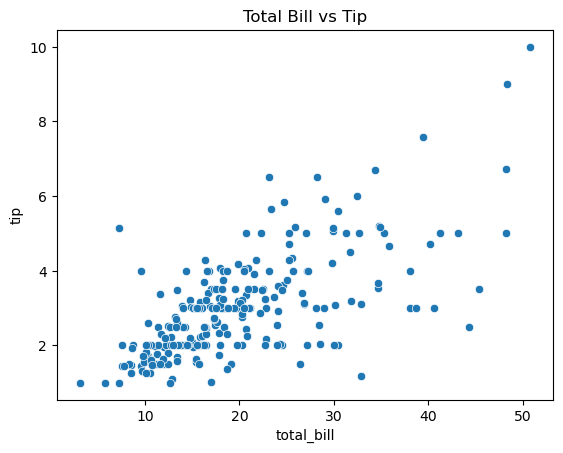

In [45]:
# Tính hệ số tương quan
tips[['total_bill','tip']].corr()

# Scatter plot
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip')
plt.show()


e. Histogram của tiền tip

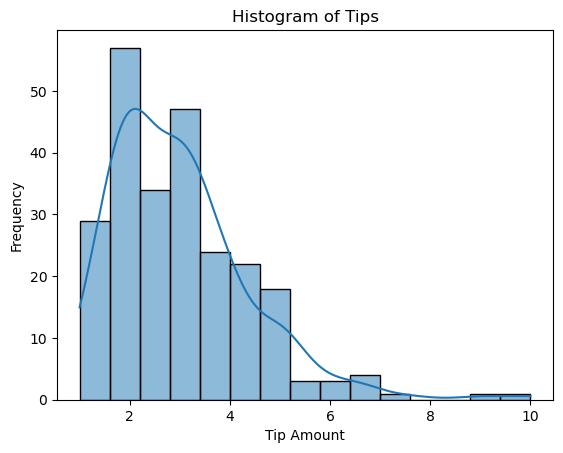

In [46]:
sns.histplot(tips['tip'], bins=15, kde=True)
plt.title('Histogram of Tips')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()


f. Box plot so sánh tiền tip giữa các ngày

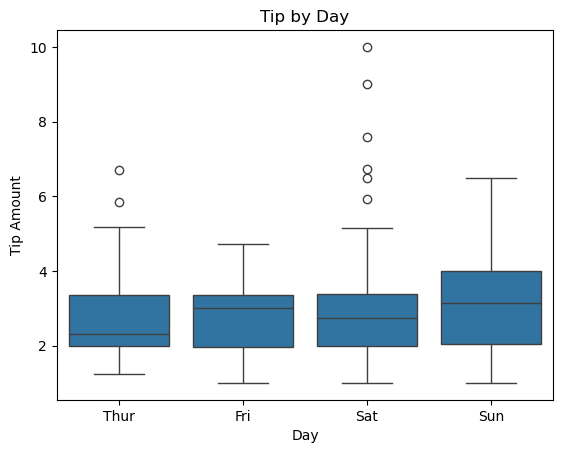

In [47]:
sns.boxplot(x='day', y='tip', data=tips)
plt.title('Tip by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()


### 10. A dataset of Seaborn

Chọn một dataset bất kỳ từ thư viện Seaborn (ngoài `tips` đã sử dụng ở trên) và thực hiện các bước sau:

a. Tìm hiểu thông tin về dataset đã chọn

b. Sử dụng kiến thức đã học để phân tích và trình bày các kết quả mà bạn khám phá được từ bộ dữ liệu trên

In [48]:
# YOUR CODE HERE
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset penguins
penguins = sns.load_dataset('penguins')


a. Tìm hiểu thông tin về dataset

In [49]:
# Thông tin tổng quan
penguins.info()

# Hiển thị 5 dòng đầu
penguins.head()

# Thống kê cơ bản cho các cột numeric
penguins.describe()

# Kiểm tra giá trị thiếu
penguins.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

b. Phân tích dữ liệu và khám phá kết quả

1. Thống kê mô tả các cột numeric

In [50]:
penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


2. Số lượng mỗi loài theo đảo

In [51]:
penguins.groupby(['island','species']).size().unstack(fill_value=0)


species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,124
Dream,56,68,0
Torgersen,52,0,0


3. So sánh các chỉ số cơ thể theo loài

In [52]:
penguins.groupby('species')[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


4. Trực quan hóa

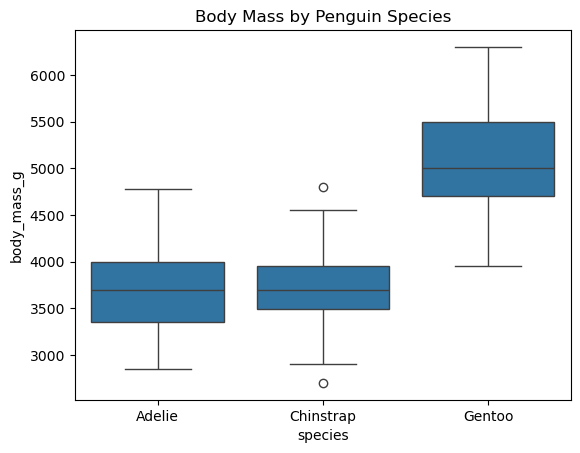

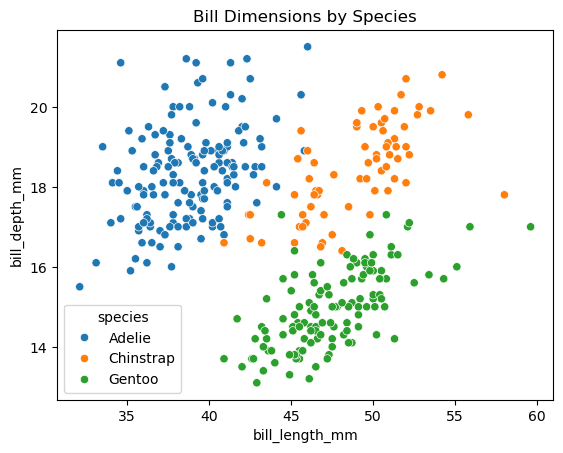

In [53]:
# Boxplot khối lượng cơ thể theo loài
sns.boxplot(x='species', y='body_mass_g', data=penguins)
plt.title("Body Mass by Penguin Species")
plt.show()

# Scatter plot: chiều dài vs chiều sâu mỏ
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=penguins)
plt.title("Bill Dimensions by Species")
plt.show()



---

## CHANGELOG

- 20250831: new version
- ...

---